<a href="https://colab.research.google.com/github/Olayasser301/Customer-Churn-Project/blob/main/Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ola Yasser Mohamed Awad Abou el Naga

ID: 52-14576

Tutorial: 8

---

Name:-

ID:-

Tutorial:-

---

Name:-

ID:-

Tutorial:-


---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/telecom_churn.csv')

df.head()

<ipython-input-51-42697d995335>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges Churn  
0           Electronic check       $29.85/m       $29.85    No  
1               Mailed check       $56.95/m      $1889.5    No  
2               Mailed check       $53.85/m      $108.15   Yes  
3  Bank transfer (automatic)        $42.3/m     $1840.75    No  
4           Electronic check        $70.7/m      $151.65   Yes  

[5 rows x 21 columns]

## Data Inspection

In [ ]:
df.info()
## in this step we get to understand the data and from the numbers here we can deduct that there's null values in both column customer ID and Total Charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

## Data Cleaning

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges Churn  
0           Electronic check       $29.85/m       $29.85    No  
1               Mailed check       $56.95/m      $1889.5    No  
2               Mailed check       $53.85/m      $108.15   Yes  
3  Bank transfer (automatic)        $42.3/m     $1840.75    No  
4           Electronic check        $70.7/m      $151.65   Yes  

[5 rows x 21 columns]

In [ ]:
df.drop(['customerID'], axis=1, inplace=True)



In [ ]:
#df1 = df.drop('gender', axis = 1)

In [ ]:
print(df.head())
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        categorical_features = categorical_col.copy()
df['Churn'] = df['Churn'].astype('category').cat.codes

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [ ]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges  \
0              Yes           Electronic check       $29.85/m       $29.85   
1               No               Mailed check       $56.95/m      $1889.5   
2              Yes               Mailed check       $53.85/m      $108.15   
3               No  Bank transfer (automatic)        $42.3/m     $1840.75   
4              Yes           Electronic check        $70.7/m      $151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [ ]:
##Now WE Smooth the null values in Total Charges Column
# Converting  'TotalCharges' to numeric after removing non-numeric characters such as the dollar sign $
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'])
df['TotalCharges']
# then finally we display the first few rows of the updated dataframe
df.head()



gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges  \
0              Yes           Electronic check       $29.85/m       $29.85   
1               No               Mailed check       $56.95/m      $1889.5   
2              Yes               Mailed check       $53.85/m      $108.15   
3               No  Bank transfer (automatic)        $42.3/m     $1840.75   
4              Yes           Electronic check        $70.7/m      $151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_features)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Columns: 8250 entries, SeniorCitizen to Churn_1
dtypes: int64(2), uint8(8248)
memory usage: 55.4 MB


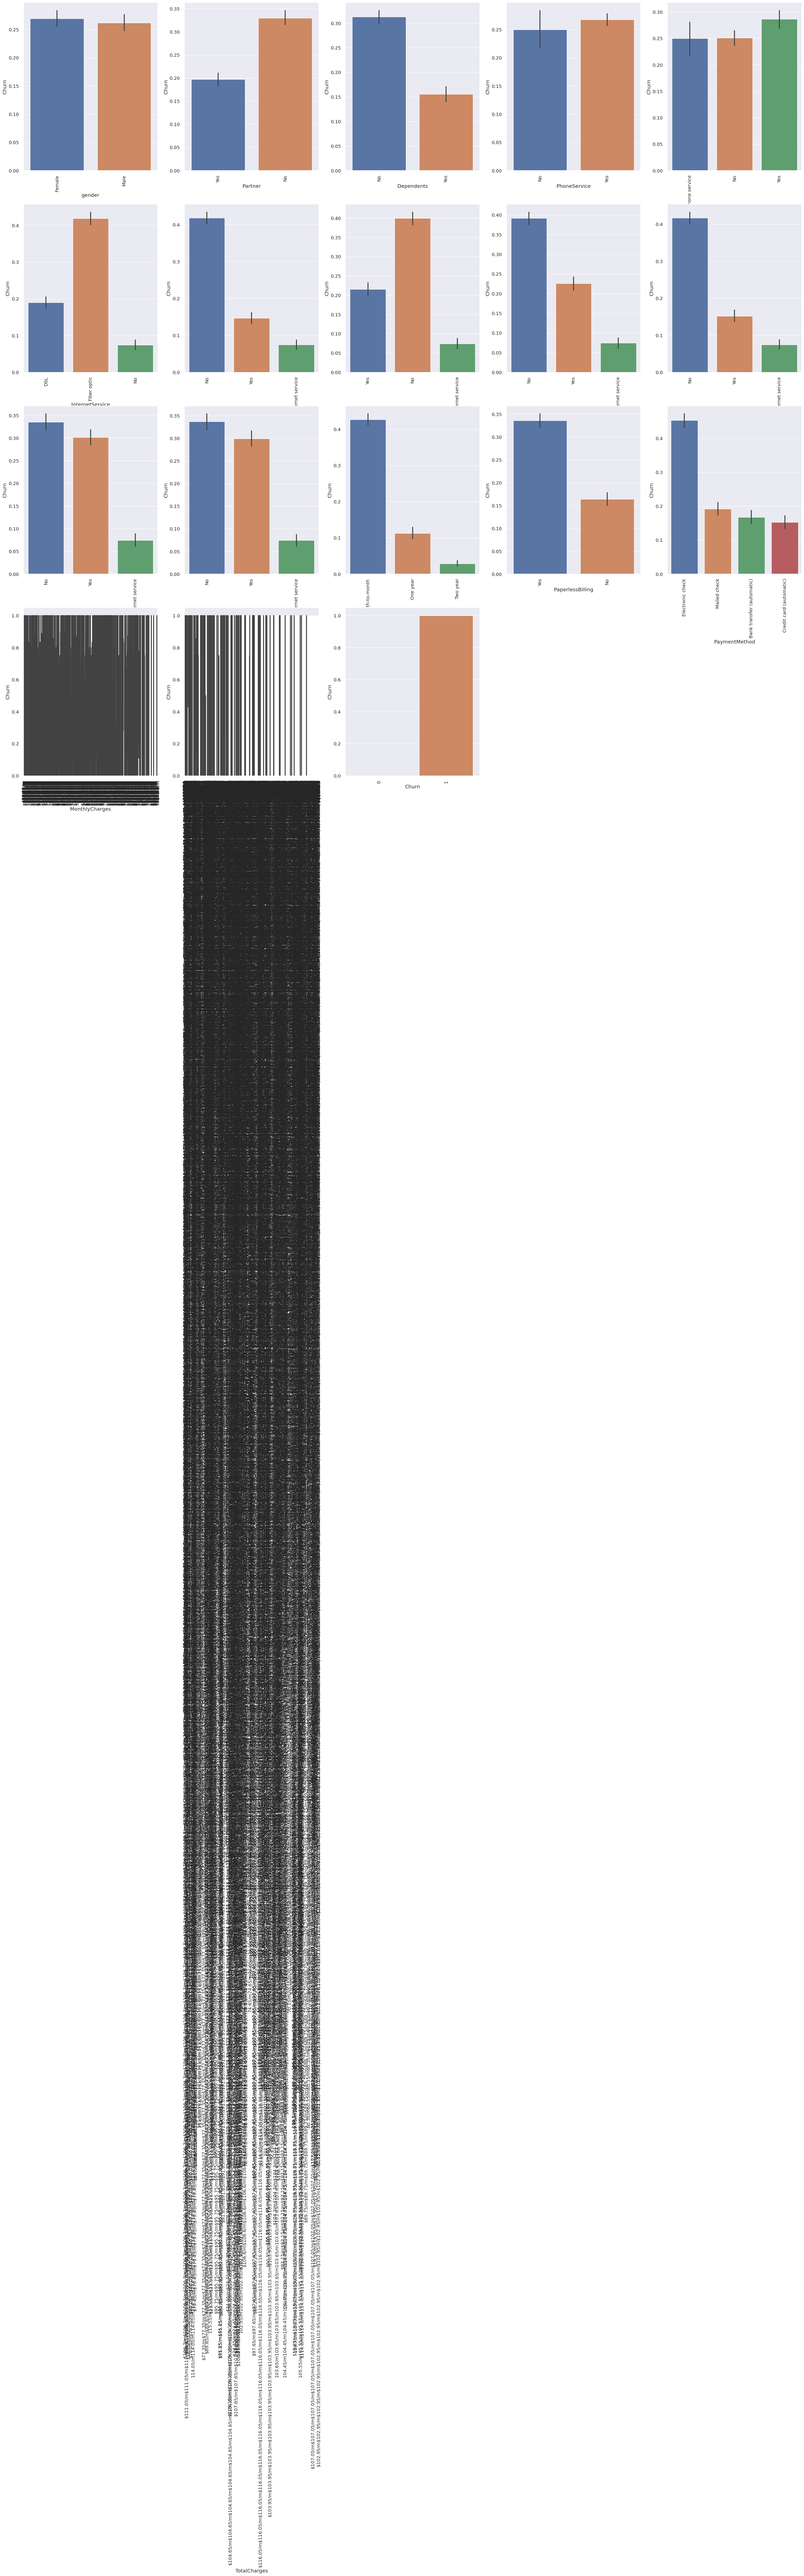

In [ ]:
# Plotting every feature average in relation to the "churn"
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(4, 5, i)
    g = sns.barplot(x=column, y='Churn', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn')
    plt.xlabel(f'{column}')

#### Having a partner decreases the Churn rate , Dependants columns have high correlation with Churn, Internet Service Column has high corr with it and Monthly charges has high corr with the Churn column.

**Answer for Q1**: Your answer here

**Q2: Which payment method has the highest churn rate?**

**Visualization**

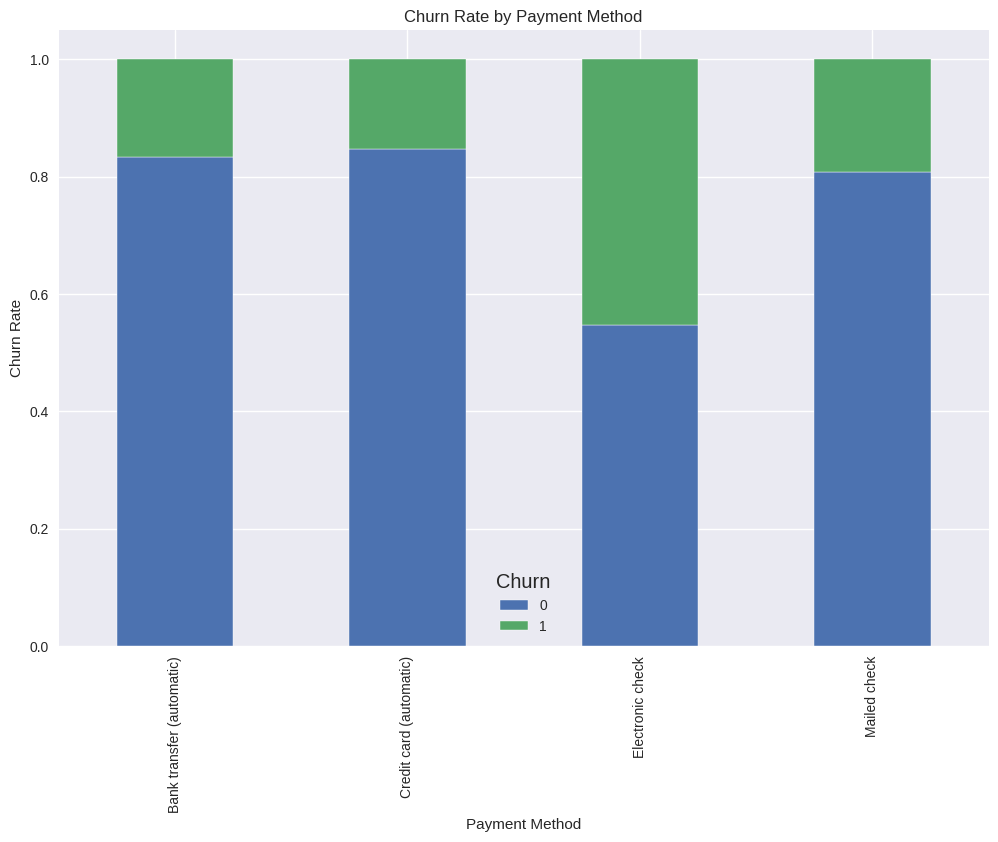

In [ ]:
## did a stacked bar plot showing the churn rate for each payment method.
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
payment_churn.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate")
plt.show()
## As we can see here Electronic check has the Highest Churn Rate.

**Answer for Q2**: Your answer here

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

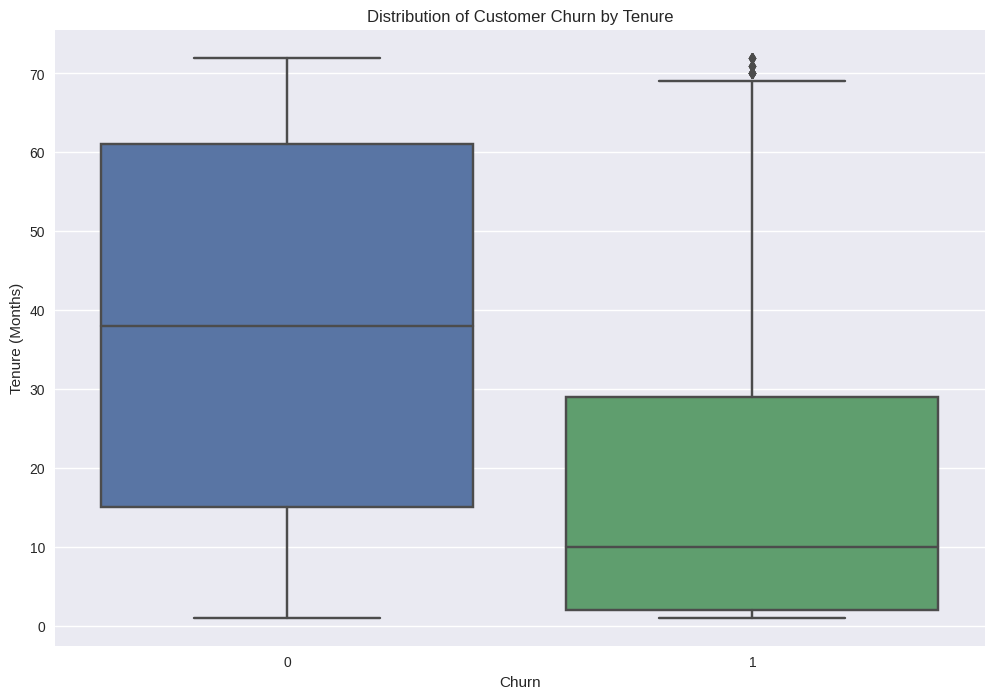

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Distribution of Customer Churn by Tenure")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()
##The fresher the tenure gets the more likely that people will churn espescially from Month 0 to 27ish

**Answer for Q3**: Your answer here

## Data Preparation for Modelling

In [ ]:
df.head()
##df.drop('customerID')

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges  \
0              Yes           Electronic check       $29.85/m       $29.85   
1               No               Mailed check       $56.95/m      $1889.5   
2              Yes               Mailed check       $53.85/m      $108.15   
3               No  Bank transfer (automatic)        $42.3/m     $1840.75   
4              Yes           Electronic check        $70.7/m      $151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have features and target variable defined
X = df.drop('Churn', axis=1)
y = df['Churn']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


## Modelling

In [ ]:

# Initializin and fitting the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluating the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print(classification_report(y_test, y_pred))



Accuracy: 0.76

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1033
           1       0.55      0.50      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407



### Tree Visualization

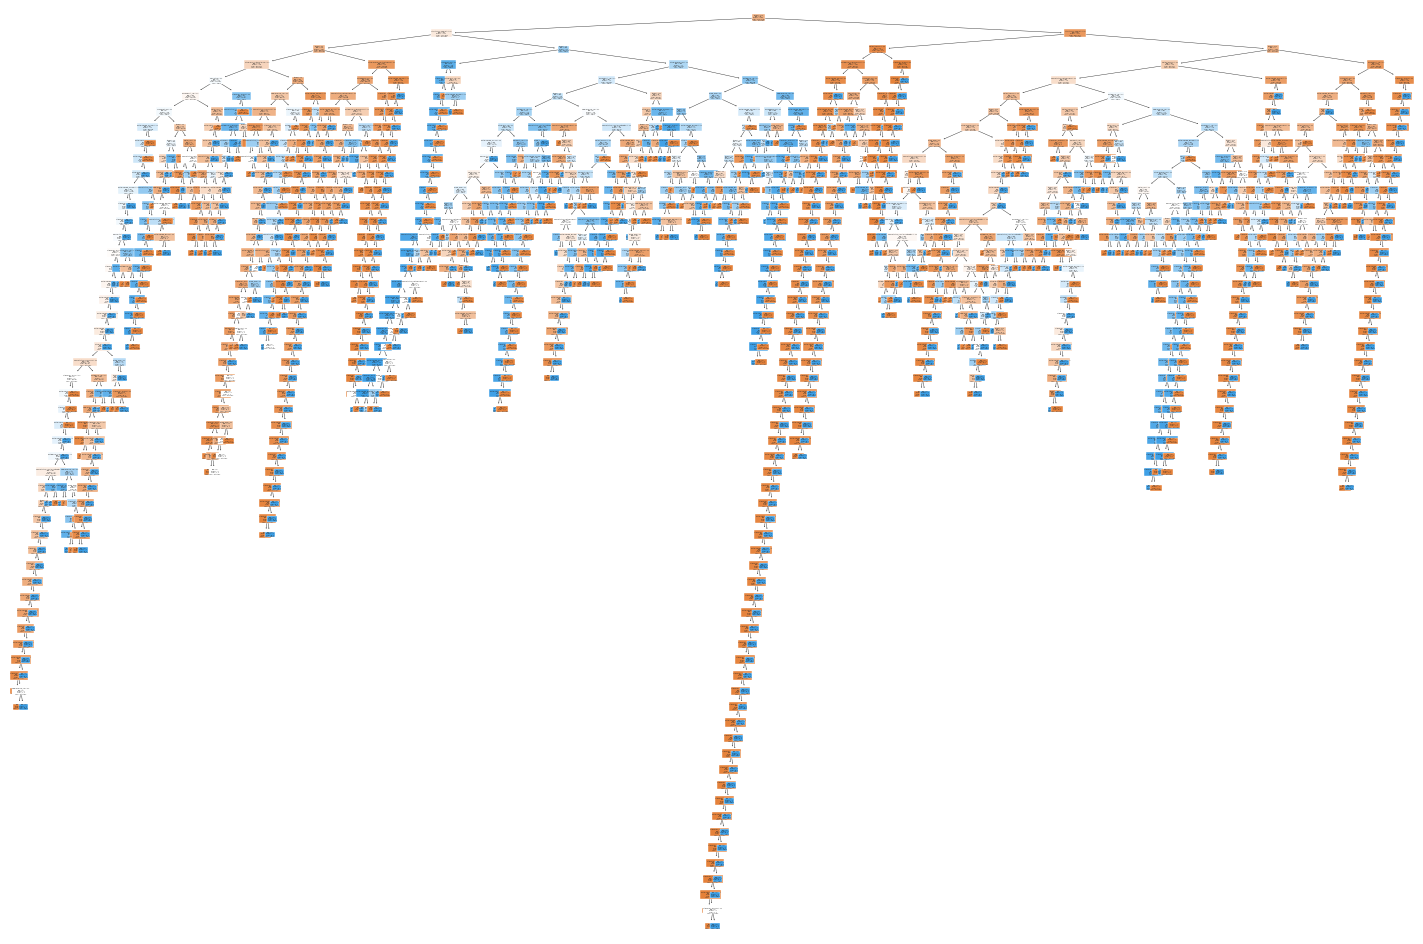

In [ ]:
# Plotting the Decision Tree
plt.figure(figsize=(18, 12))
plot_tree(tree_model, filled=True, feature_names=X_encoded.columns, class_names=['Not Churn', 'Churn'])
plt.show()



## Evaluation

## Bonus (Optional)